### Importing Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [4]:
file = 'ratings.csv'

df = pd.read_csv(file)

df = df.drop('Timestamp', axis=1)

## Exploratory Data Analysis

### Shape

In [5]:
rows, columns = df.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

No of rows =  2023070
No of columns =  3


### Datatype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
dtypes: float64(1), object(2)
memory usage: 46.3+ MB


### Missing value analysis

In [7]:
df.isna().sum()

UserId       0
ProductId    0
Rating       0
dtype: int64

### Summary

In [9]:
df['Rating'].describe()

count    2.023070e+06
mean     4.149036e+00
std      1.311505e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

### Rating distribution

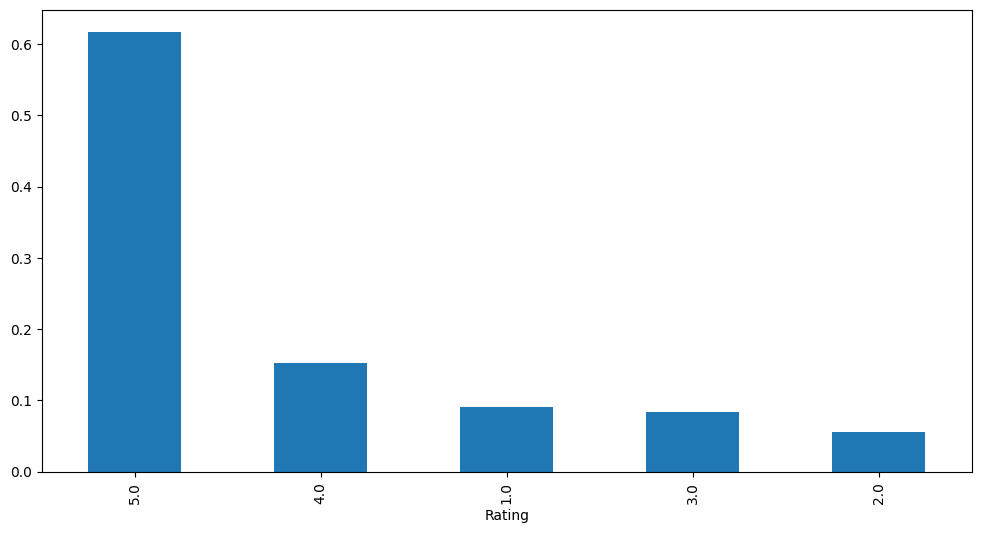

In [11]:
plt.figure(figsize = (12,6))
df['Rating'].value_counts(1).plot(kind='bar')
plt.show()

### Nummber of unique users and products

In [12]:
print('Number of unique USERS in Raw data = ', df['UserId'].nunique())
print('Number of unique ITEMS in Raw data = ', df['ProductId'].nunique())

Number of unique USERS in Raw data =  1210271
Number of unique ITEMS in Raw data =  249274


### Users with most number of rating

In [14]:
most_rated = df.groupby('UserId').size().sort_values(ascending=False)[:10]
most_rated

UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
ALQGOMOY1F5X9     275
AKMEY1BSHSDG7     269
A3R9H6OKZHHRJD    259
A1M04H40ZVGWVG    249
A1RRMZKOMZ2M7J    225
dtype: int64

### Pre-Processing

In [15]:
counts = df['UserId'].value_counts()
df_final = df[df['UserId'].isin(counts[counts >= 50].index)]

In [16]:
print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['UserId'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['ProductId'].nunique())

The number of observations in the final data = 29559
Number of unique USERS in the final data =  361
Number of unique PRODUCTS in the final data =  17228


### Checking the density of the rating matrix

In [18]:
final_ratings_matrix = df_final.pivot(index = 'UserId', columns ='ProductId', values = 'Rating').fillna(0)
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]

density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()


density: 0.48%


ProductId       0762451459  1304482596  1304482685  1304495396  1304511111  \
UserId                                                                       
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS         0.0         0.0         0.0         0.0         0.0   
A10G136JEISLVR         0.0         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0         0.0         0.0         0.0         0.0         0.0   
A110PQTEI6THU7         0.0         0.0         0.0         0.0         0.0   

ProductId       1304511138  1304622665  1304624498  1304651029  130466578X  \
UserId                                                                       
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS         0.0         0.0         0.0         0.0         0.0   
A10G136JEISLVR         0.0         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0         0.0         0.0         0.0         0.0         0.0   
A110PQTEI6THU7         0.0         0.0         0.0         0.0         0.0   

ProductId       ...  B00L3LB0IG  B00L3LBUGI  B00L4I5PJS  B00L5BXG36  \
UserId          ...                                                   
A100WO06OQR8BQ  ...         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS  ...         0.0         0.0         0.0         0.0   
A10G136JEISLVR  ...         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0  ...         0.0         0.0         0.0         0.0   
A110PQTEI6THU7  ...         0.0         0.0         0.0         0.0   

ProductId       B00L5KTZ0K  B00L7BX4FE  B00LG63DOM  B00LH81A0I  B00LLPT4HI  \
UserId                                                                       
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS         0.0         0.0         0.0         0.0         0.0   
A10G136JEISLVR         0.0         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0         0.0         0.0         0.0         0.0         0.0   
A110PQTEI6THU7         0.0         0.0         0.0         0.0         0.0   

ProductId       B00LMOT7X4  
UserId                      
A100WO06OQR8BQ         0.0  
A1047EDJ84IMAS         0.0  
A10G136JEISLVR         0.0  
A10Y59HW4O47N0         0.0  
A110PQTEI6THU7         0.0  

[5 rows x 17228 columns]

## User based Recommendation system

In [19]:
final_ratings_matrix.head()

ProductId       0762451459  1304482596  1304482685  1304495396  1304511111  \
UserId                                                                       
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS         0.0         0.0         0.0         0.0         0.0   
A10G136JEISLVR         0.0         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0         0.0         0.0         0.0         0.0         0.0   
A110PQTEI6THU7         0.0         0.0         0.0         0.0         0.0   

ProductId       1304511138  1304622665  1304624498  1304651029  130466578X  \
UserId                                                                       
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS         0.0         0.0         0.0         0.0         0.0   
A10G136JEISLVR         0.0         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0         0.0         0.0         0.0         0.0         0.0   
A110PQTEI6THU7         0.0         0.0         0.0         0.0         0.0   

ProductId       ...  B00L3LB0IG  B00L3LBUGI  B00L4I5PJS  B00L5BXG36  \
UserId          ...                                                   
A100WO06OQR8BQ  ...         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS  ...         0.0         0.0         0.0         0.0   
A10G136JEISLVR  ...         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0  ...         0.0         0.0         0.0         0.0   
A110PQTEI6THU7  ...         0.0         0.0         0.0         0.0   

ProductId       B00L5KTZ0K  B00L7BX4FE  B00LG63DOM  B00LH81A0I  B00LLPT4HI  \
UserId                                                                       
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A1047EDJ84IMAS         0.0         0.0         0.0         0.0         0.0   
A10G136JEISLVR         0.0         0.0         0.0         0.0         0.0   
A10Y59HW4O47N0         0.0         0.0         0.0         0.0         0.0   
A110PQTEI6THU7         0.0         0.0         0.0         0.0         0.0   

ProductId       B00LMOT7X4  
UserId                      
A100WO06OQR8BQ         0.0  
A1047EDJ84IMAS         0.0  
A10G136JEISLVR         0.0  
A10Y59HW4O47N0         0.0  
A110PQTEI6THU7         0.0  

[5 rows x 17228 columns]

In [20]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

final_ratings_matrix.head()

ProductId   0762451459  1304482596  1304482685  1304495396  1304511111  \
user_index                                                               
0                  0.0         0.0         0.0         0.0         0.0   
1                  0.0         0.0         0.0         0.0         0.0   
2                  0.0         0.0         0.0         0.0         0.0   
3                  0.0         0.0         0.0         0.0         0.0   
4                  0.0         0.0         0.0         0.0         0.0   

ProductId   1304511138  1304622665  1304624498  1304651029  130466578X  ...  \
user_index                                                              ...   
0                  0.0         0.0         0.0         0.0         0.0  ...   
1                  0.0         0.0         0.0         0.0         0.0  ...   
2                  0.0         0.0         0.0         0.0         0.0  ...   
3                  0.0         0.0         0.0         0.0         0.0  ...   
4                  0.0         0.0         0.0         0.0         0.0  ...   

ProductId   B00L3LB0IG  B00L3LBUGI  B00L4I5PJS  B00L5BXG36  B00L5KTZ0K  \
user_index                                                               
0                  0.0         0.0         0.0         0.0         0.0   
1                  0.0         0.0         0.0         0.0         0.0   
2                  0.0         0.0         0.0         0.0         0.0   
3                  0.0         0.0         0.0         0.0         0.0   
4                  0.0         0.0         0.0         0.0         0.0   

ProductId   B00L7BX4FE  B00LG63DOM  B00LH81A0I  B00LLPT4HI  B00LMOT7X4  
user_index                                                              
0                  0.0         0.0         0.0         0.0         0.0  
1                  0.0         0.0         0.0         0.0         0.0  
2                  0.0         0.0         0.0         0.0         0.0  
3                  0.0         0.0         0.0         0.0         0.0  
4                  0.0         0.0         0.0         0.0         0.0  

[5 rows x 17228 columns]

### Function to find Similar users and their similarity scores

In [21]:
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): 
        
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        
        similarity.append((user,sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] 
    similarity_score = [tup[1] for tup in similarity] 
   
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

#### Finding out top 10 similar users to the user index 3 and their similarity score

In [22]:
similar = similar_users(3,final_ratings_matrix)[0][0:10]
similar

[228, 125, 344, 0, 1, 2, 4, 5, 6, 7]

In [23]:
similar_users(3,final_ratings_matrix)[1][0:10]

[array([[0.02114207]]),
 array([[0.0174968]]),
 array([[0.01236717]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]])]

#### Finding out top 10 similar users to the user index 1000 and their similarity score

In [26]:
similar = similar_users(100, final_ratings_matrix)[0][0:10]
similar

[136, 154, 69, 321, 46, 203, 170, 236, 177, 316]

In [28]:
similar_users(100,final_ratings_matrix)[1][0:10]

[array([[0.10030071]]),
 array([[0.0821001]]),
 array([[0.08092916]]),
 array([[0.07160447]]),
 array([[0.07002866]]),
 array([[0.06994021]]),
 array([[0.06786232]]),
 array([[0.06727092]]),
 array([[0.06722503]]),
 array([[0.06522803]])]

### Function to recommend products

In [29]:
def recommendations(user_index, num_of_products, interactions_matrix):
    
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []
    
    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:
            
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break
    
    return recommendations[:num_of_products]

#### Recommend 5 products to user index 3 based on similarity based collaborative filtering

In [30]:
recommendations(3,5,final_ratings_matrix)

['B0026IFLH6', 'B0056KD6N2', 'B004SU88CU', 'B004I5DFYQ', 'B005FVSH0O']

#### Recommend 5 products to user index 100 based on similarity based collaborative filtering

In [32]:
recommendations(100,5,final_ratings_matrix)

['B00AE07CTI', 'B000YZGP4G', 'B00GTC1JVM', 'B00A0J09G6', 'B00A0IWRRG']